In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
path = '../txtfiles-7/'
f8_1 = pd.read_csv(path + 'at_eff_8_1.txt', sep=' ', header=1)
f8_3 = pd.read_csv(path + 'at_eff_8_3.txt', sep=' ', header=1)
f16_1 = pd.read_csv(path + 'at_eff_16_1.txt', sep=' ', header=1)
f16_3 = pd.read_csv(path + 'at_eff_16_3.txt', sep=' ', header=1)
f32_1 = pd.read_csv(path + 'at_eff_32_1.txt', sep=' ', header=1)
f32_3 = pd.read_csv(path + 'at_eff_32_3.txt', sep=' ', header=1)
#f64_1 = pd.read_csv(path + 'at_eff_64_1.txt', sep=' ', header=1)
#f64_3 = pd.read_csv(path + 'at_eff_64_3.txt', sep=' ', header=1)

g8 = pd.read_csv(path + 'at_met_8.txt', sep=' ', header=0)
g16 = pd.read_csv(path + 'at_met_16.txt', sep=' ', header=0)
g32 = pd.read_csv(path + 'at_met_32.txt', sep=' ', header=0)
#g64 = pd.read_csv(path + 'at_met_64.txt', sep=' ', header=0)

In [9]:
data = 50000
c_trial=int(len(f8_1.magnet)/data)
m_trial=int(len(g8.magnet)/100000)
print(c_trial, m_trial)

10 10


### a. cluster model at critical

In [15]:
start1=0
m_c_8_1=np.zeros((c_trial,data-start1))
m_c_16_1=np.zeros((c_trial,data-start1))
m_c_32_1=np.zeros((c_trial,data-start1))
#m_c_64_1=np.zeros((c_trial,data-start1))
m_c_8_3=np.zeros((c_trial,data-start1))
m_c_16_3=np.zeros((c_trial,data-start1))
m_c_32_3=np.zeros((c_trial,data-start1))
#m_c_64_2=np.zeros((c_trial,data-start1))
for i in range (c_trial):
    m_c_8_1[i]=np.array(f8_1.magnet[start1+data*i:data+data*i])
    m_c_16_1[i]=np.array(f16_1.magnet[start1+data*i:data+data*i])
    m_c_32_1[i]=np.array(f32_1.magnet[start1+data*i:data+data*i])
    m_c_8_3[i]=np.array(f8_3.magnet[start1+data*i:data+data*i])
    m_c_16_3[i]=np.array(f16_3.magnet[start1+data*i:data+data*i])
    m_c_32_3[i]=np.array(f32_3.magnet[start1+data*i:data+data*i])
    #m_c_64[i]=np.array(f64.magnet[start1+data*i:data+data*i])
    
start2=50000
m_m_8=np.zeros((m_trial,100000-start2))
m_m_16=np.zeros((m_trial,100000-start2))
m_m_32=np.zeros((m_trial,100000-start2))
#m_m_64=np.zeros((m_trial,100000-start2))
#m_m_128=np.zeros((m_trial,100000-start2))
for i in range (m_trial):
    m_m_8[i]=np.array(g8.magnet[start2+100000*i:100000+100000*i])
    m_m_16[i]=np.array(g16.magnet[start2+100000*i:100000+100000*i])
    m_m_32[i]=np.array(g32.magnet[data*i:data+data*i])
    #m_m_64[i]=np.array(g64.magnet[start2+100000*i:100000+100000*i])
    #m_m_128[i]=np.array(g128.magnet[start2+100000*i:100000+100000*i])

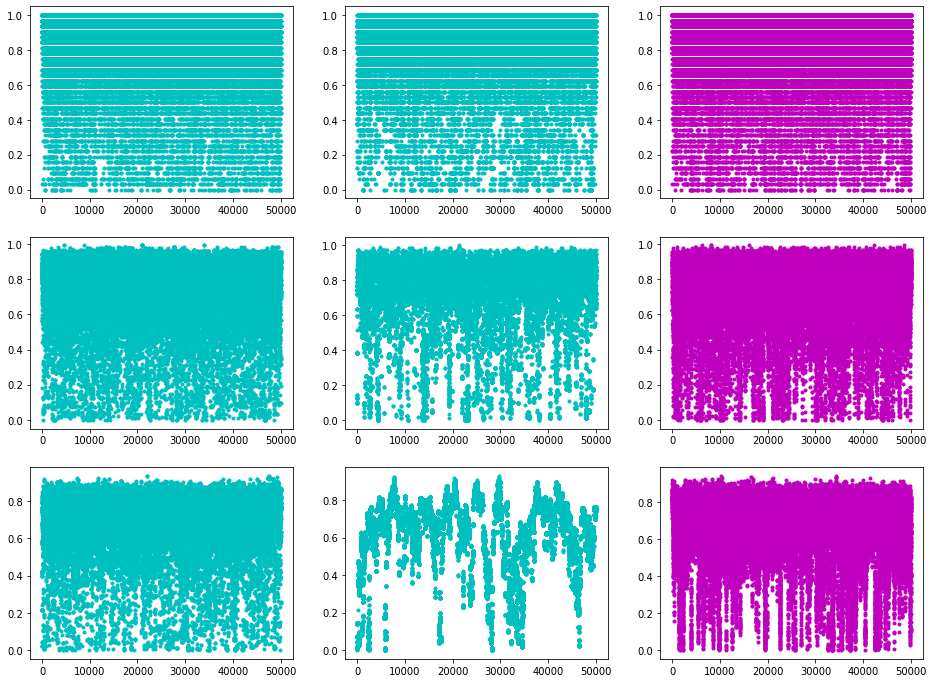

In [16]:
t=np.arange(len(m_c_8_1[0]))
t2=np.arange(len(m_m_8[0]))
fig, ax = plt.subplots(3, 3, figsize = (16, 12))
ith=3
ax[0, 0].plot(t, m_c_8_1[ith], 'c.')
ax[0, 1].plot(t, m_c_8_3[ith], 'c.')
ax[0, 2].plot(t2, m_m_8[ith], 'm.')
ax[1, 0].plot(t, m_c_16_1[ith], 'c.')
ax[1, 1].plot(t, m_c_16_3[ith], 'c.')
ax[1, 2].plot(t2, m_m_16[ith], 'm.')
ax[2, 0].plot(t, m_c_32_1[ith], 'c.')
ax[2, 1].plot(t, m_c_32_3[ith], 'c.')
ax[2, 2].plot(t2, m_m_32[ith], 'm.')

plt.show()

## 1. Autocorrelation calculation: function & windowing

In [6]:
def old_attime(yy, n):
    c_0=np.var(yy)
    inside=0
    for i in range(1, n):
        iinside =0
        for j in range (1, n-i):
            iinside = iinside + (yy[i]-np.mean(yy))*(yy[i+j]-np.mean(yy))
        inside = inside + 1/(n-i) * iinside
    return 1+2*inside/c_0

def next_pow_2(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x):
    x = np.atleast_1d(x)
    nn = next_pow_2(len(x))
    f = np.fft.fft(x-np.mean(x), n=nn*2)
    acf = np.real(np.fft.ifft(f * np.conjugate(f))[:len(x)])/(4*nn)
    acf = acf / (len(x)-np.arange(len(x)))
    acf = acf/acf[0]
    return acf

def autocorr_time(yy):
    #c_0 = np.var(yy)
    A = autocorr_func_1d(yy)
    return -1+2*np.sum(A[:100])

def auto_window(taus):
    m = np.arange(len(taus)) < 5 * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1
def autocorr_gw2010(y):
    f = autocorr_func_1d(y)
    taus = -1+2*np.cumsum(f)
    window = auto_window(taus)
    return taus[window]

## [WARNING] Don't touch these...
This takes enormous time to calculate, and this cell will set my efforts to ZERO... Just import all datas I calculated.

In [7]:
m8=np.zeros((m_trial, len(m_m_8[0])))
m16=np.zeros((m_trial, len(m_m_16[0])))

c8_1=np.zeros((c_trial, len(m_c_8_1[0])))
c16_1=np.zeros((c_trial, len(m_c_16_1[0])))
c8_3=np.zeros((c_trial, len(m_c_8_3[0])))
c16_3=np.zeros((c_trial, len(m_c_16_3[0])))

for i in range (m_trial):
    for j in range (1, data):
        m8[i][j]=autocorr_gw2010(m_m_8[i][:j])
        m16[i][j]=autocorr_gw2010(m_m_16[i][:j])
        
        c8_1[i][j]=autocorr_gw2010(m_c_8_1[i][:j])
        c16_1[i][j]=autocorr_gw2010(m_c_16_1[i][:j])
        c8_3[i][j]=autocorr_gw2010(m_c_8_3[i][:j])
        c16_3[i][j]=autocorr_gw2010(m_c_16_3[i][:j])
    print(i)

/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


0


/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


1
2
3
4
5
6
7
8
9


In [18]:
c8_1=c8_1/2
c16_1=c16_1/2
c8_3=c8_3/2
c16_3=c16_3/2

m8=m8/2
m16=m16/2

In [19]:
m32=np.zeros((m_trial, len(m_m_32[0])))
c32_1=np.zeros((c_trial, len(m_c_32_1[0])))
c32_3=np.zeros((c_trial, len(m_c_32_3[0])))

for i in range (m_trial):
    for j in range (1, data):
        m32[i][j]=autocorr_gw2010(m_m_32[i][:j])
        c32_1[i][j]=autocorr_gw2010(m_c_32_1[i][:j])
        c32_3[i][j]=autocorr_gw2010(m_c_32_3[i][:j])
    print(i)
    
c32_1 = c32_1/2
c32_3 = c32_3/2
m32 = m32/2

/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/hyejin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less


0
1
2
3
4
5
6
7
8
9


Divide by 2 when it is needed.

#### +save results above
Just import these.

In [16]:
np.savetxt("c8_1.txt", c8)
np.savetxt("c16_1.txt", c16)
np.savetxt("c32_1.txt", c32)
np.savetxt("c8_3.txt", c8)
np.savetxt("c16_3.txt", c16)
np.savetxt("c32_3.txt", c32)
np.savetxt("m8.txt", m8)
np.savetxt("m16.txt", m16)
np.savetxt("m32.txt", m32)

In [112]:
""" #import the integrated autocorrelation time of magnetization
c88=pd.read_csv('c8.txt', sep=' ', header=None)
c88[0] #column
c88.loc[0] #row
"""

"\nc88=pd.read_csv('c8.txt', sep=' ', header=None)\nc88[0] #column\nc88.loc[0] #row\n"

## 2. Plot!
### a. cluster model

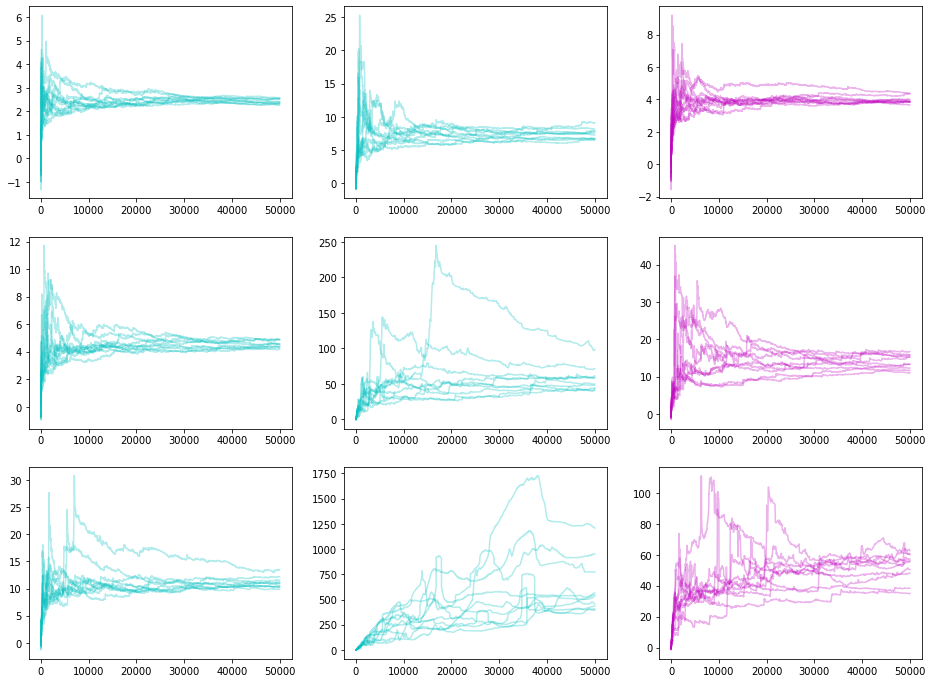

In [21]:
fig, ax = plt.subplots(3, 3, figsize = (16, 12))
for k in range (c_trial):
    ax[0, 0].plot(t, c8_1[k], 'c-', alpha = 0.3)
    ax[0, 1].plot(t, c8_3[k], 'c-', alpha = 0.3)
    ax[0, 2].plot(t2, m8[k], 'm-', alpha = 0.3)
    ax[1, 0].plot(t, c16_1[k], 'c-', alpha = 0.3)
    ax[1, 1].plot(t, c16_3[k], 'c-', alpha = 0.3)
    ax[1, 2].plot(t2, m16[k], 'm-', alpha = 0.3)
    ax[2, 0].plot(t, c32_1[k], 'c-', alpha = 0.3)
    ax[2, 1].plot(t, c32_3[k], 'c-', alpha = 0.3)
    ax[2, 2].plot(t2, m32[k], 'm-', alpha = 0.3)
plt.show()

## 3. Compare autocorrelation time: metropolis vs cluster
### a. cluster model

In [23]:
c1_avg = np.zeros((3, data))
c1_std = np.zeros((3, data))
c3_avg = np.zeros((3, data))
c3_std = np.zeros((3, data))
m_avg = np.zeros((3, data))
m_std = np.zeros((3, data))
for j in range (data):
    c1_avg[0][j]=np.average(c8_1[:, j])
    c1_std[0][j]=np.std(c8_1[:, j])
    c1_avg[1][j]=np.average(c16_1[:, j])
    c1_std[1][j]=np.std(c16_1[:, j])
    c1_avg[2][j]=np.average(c32_1[:, j])
    c1_std[2][j]=np.std(c32_1[:, j])
    c3_avg[0][j]=np.average(c8_3[:, j])
    c3_std[0][j]=np.std(c8_3[:, j])
    c3_avg[1][j]=np.average(c16_3[:, j])
    c3_std[1][j]=np.std(c16_3[:, j])
    c3_avg[2][j]=np.average(c32_3[:, j])
    c3_std[2][j]=np.std(c32_3[:, j])
    
    m_avg[0][j]=np.average(m8[:, j])
    m_std[0][j]=np.std(m8[:, j])
    m_avg[1][j]=np.average(m16[:, j])
    m_std[1][j]=np.std(m16[:, j])
    m_avg[2][j]=np.average(m32[:, j])
    m_std[2][j]=np.std(m32[:, j])

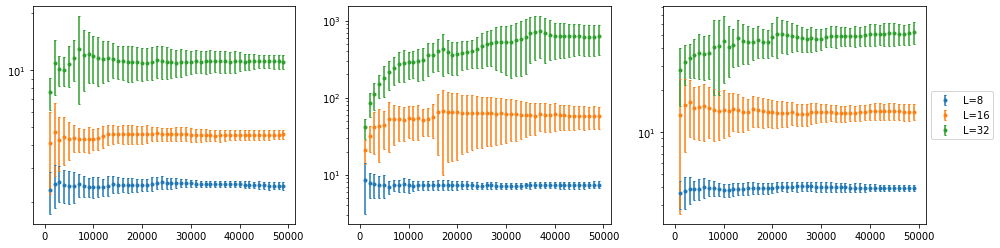

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
lbs = ['L=8', 'L=16', 'L=32']
for i in range (3):
    ax[0].errorbar(t[t%1000==0], c1_avg[i][t%1000==0], yerr=c1_std[i][t%1000==0], marker=".", linestyle="", capsize=1, label=lbs[i])
    ax[1].errorbar(t[t%1000==0], c3_avg[i][t%1000==0], yerr=c3_std[i][t%1000==0], marker=".", linestyle="", capsize=1, label=lbs[i])
    ax[2].errorbar(t[t%1000==0], m_avg[i][t%1000==0], yerr=m_std[i][t%1000==0], marker=".", linestyle="", capsize=1, label=lbs[i])
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
plt.show()

### c. compare

cluster 1 = 1.0991043206947007
cluster 3 = 3.198357765714658
metropolis = 1.8644332583699432


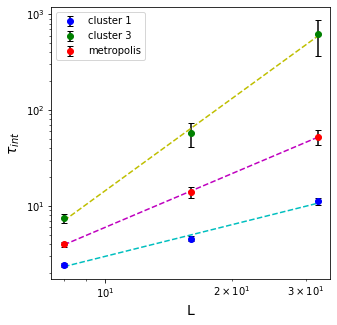

In [26]:
L=np.array([8*2**i for i in range (3)])
c1_fin_a=np.array([c1_avg[v][-1] for v in range (3)])
c1_fin_s=np.array([c1_std[v][-1] for v in range (3)])
c3_fin_a=np.array([c3_avg[v][-1] for v in range (3)])
c3_fin_s=np.array([c3_std[v][-1] for v in range (3)])
m_fin_a=np.array([m_avg[v][-1] for v in range (3)])
m_fin_s=np.array([m_std[v][-1] for v in range (3)])

z1=np.polyfit(np.log(L), np.log(c1_fin_a), 1)
z2=np.polyfit(np.log(L), np.log(c3_fin_a), 1)
z3=np.polyfit(np.log(L), np.log(m_fin_a), 1)
print("cluster 1 =", z1[0])
print("cluster 3 =", z2[0])
print("metropolis =", z3[0])

plt.figure(figsize=(5, 5))
plt.errorbar(L, c1_fin_a, yerr=c1_fin_s, fmt='bo', linestyle='', ecolor='k', capsize=3, label='cluster 1')
plt.errorbar(L, c3_fin_a, yerr=c3_fin_s, fmt='go', linestyle='', ecolor='k', capsize=3, label='cluster 3')
plt.errorbar(L, m_fin_a, yerr=m_fin_s, fmt='ro', linestyle='', ecolor='k', capsize=3, label='metropolis')
plt.plot(L, np.exp(np.poly1d(z1)(np.log(L))), 'c--')
plt.plot(L, np.exp(np.poly1d(z2)(np.log(L))), 'y--')
plt.plot(L, np.exp(np.poly1d(z3)(np.log(L))), 'm--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$\\tau_{int}$', fontsize=14)
plt.xlabel('L', fontsize=14)
plt.legend()

plt.show()